In [3]:
import numpy as np #array
import pandas as pd #data frame
import re #gerer les chaine de caractére en python
import nltk #traitement automatique des langues,
import matplotlib.pyplot as plt #affichage
%matplotlib inline


In [4]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv" 
airline_tweets = pd.read_csv(data_source_url)


In [5]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1]) 
plot_size[0] = 20
plot_size[1] = 20 
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


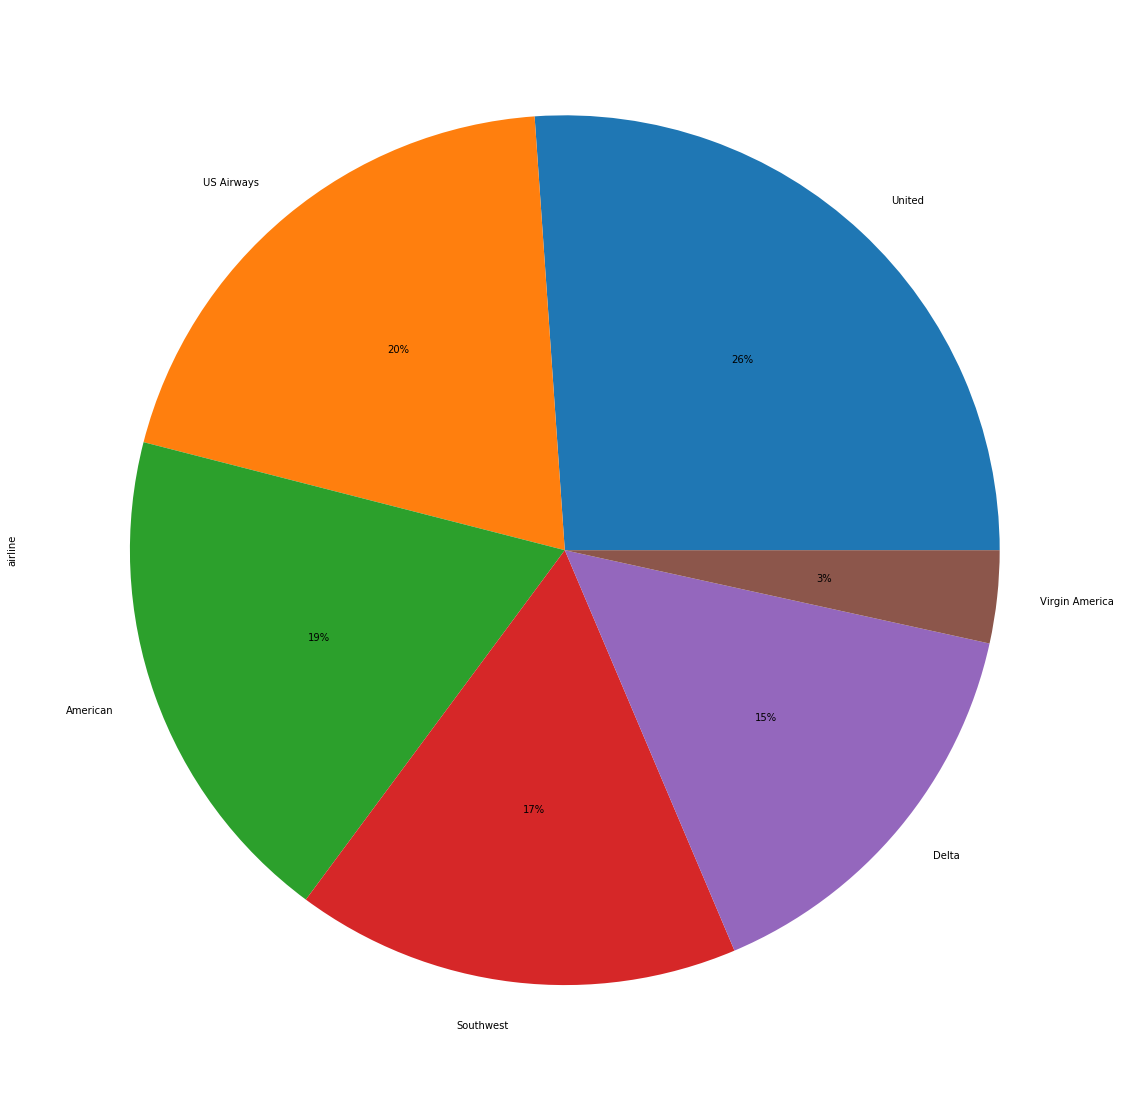

In [7]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')


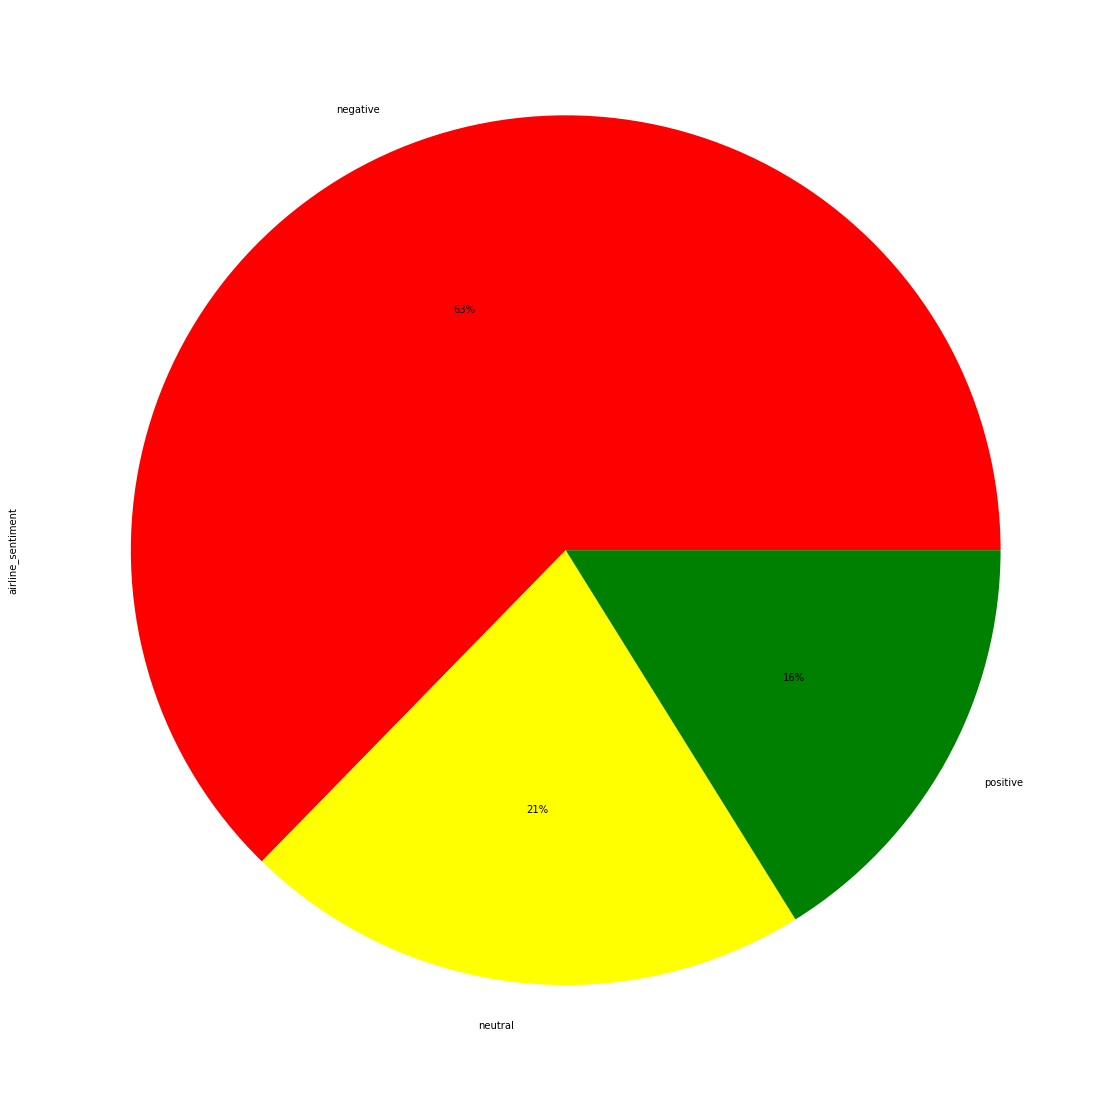

In [16]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

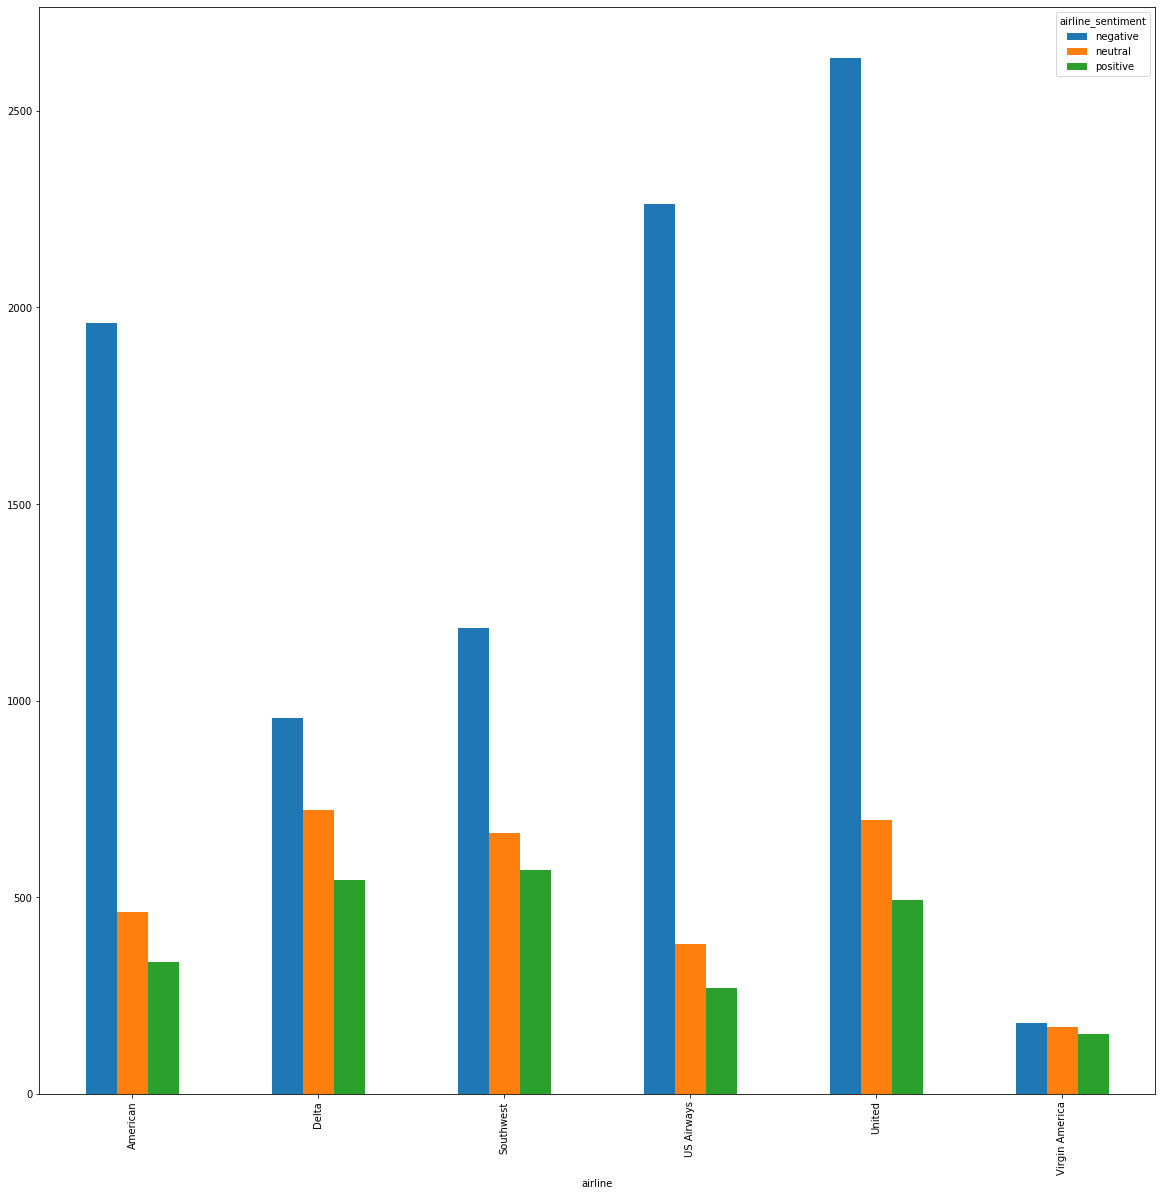

In [8]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack() 
airline_sentiment.plot(kind='bar')

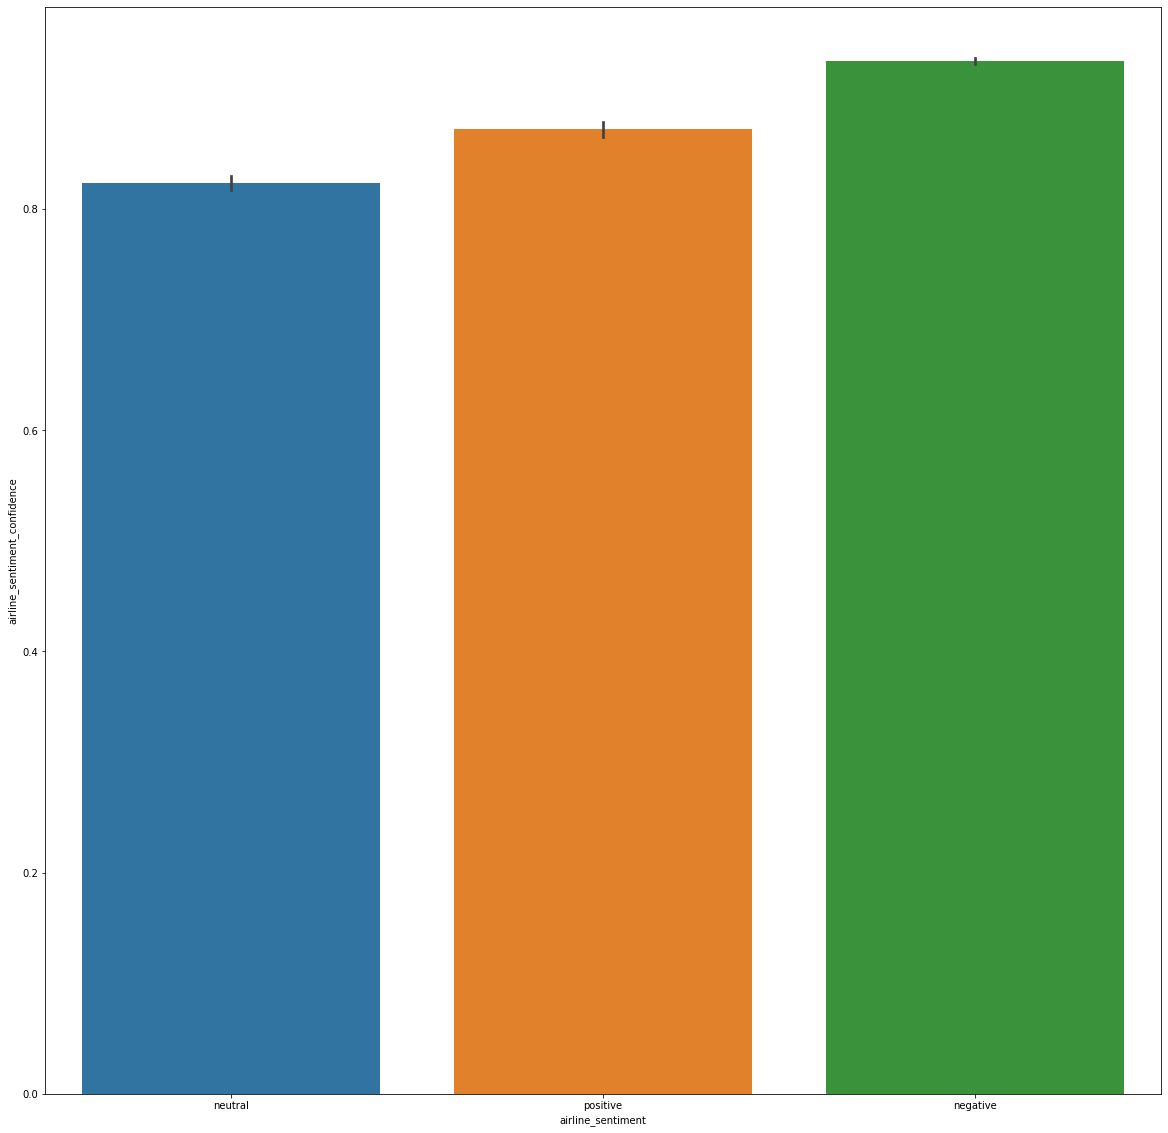

In [9]:
import seaborn as sns
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

In [10]:
features = airline_tweets.iloc[:, 10].values 
labels = airline_tweets.iloc[:, 1].values


In [12]:
import nltk #
nltk.download('stopwords') #chaque dict elle a les mots qui on peut le filtrer
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer

processed_features = []
for sentence in range(0, len(features)):
    # Remove all the special characters   
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)   #suppprimer les caractére 
    # Remove single characters from the start 
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Substituting multiple spaces with single space 
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I) 
    # Removing prefixed 'b'  
    processed_feature = re.sub(r'^b\s+', '', processed_feature)   
    # Converting to Lowercase 
    processed_feature = processed_feature.lower()  
    processed_features.append(processed_feature) 
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english')) 
processed_features = vectorizer.fit_transform(processed_features).toarray()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jawha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [14]:
predictions = text_classifier.predict(X_test)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 

In [30]:
print(confusion_matrix(y_test,predictions)) 
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))


[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


SVM 

In [17]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred = svclassifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[1858   12    0]
 [ 537   70    7]
 [ 391    9   44]]
              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      1870
     neutral       0.77      0.11      0.20       614
    positive       0.86      0.10      0.18       444

    accuracy                           0.67      2928
   macro avg       0.77      0.40      0.39      2928
weighted avg       0.72      0.67      0.58      2928

0.6734972677595629


ANN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[1500  316   54]
 [ 252  310   52]
 [ 118  103  223]]
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      1870
     neutral       0.43      0.50      0.46       614
    positive       0.68      0.50      0.58       444

    accuracy                           0.69      2928
   macro avg       0.64      0.60      0.61      2928
weighted avg       0.70      0.69      0.70      2928

0.6943306010928961
